IMPORTACIÓN DEL DATASET


In [2]:
#IMPORTANCION DE DATOS PARA PREPROCESAMIENTO DE LOS DATOS Y LA VISUALIZACION

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
df = pd.read_csv("D:\\Descargas\\archive (1)\\superstore_data.csv")
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
df.shape

(2240, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ANÁLISIS: DATOS FALTANTES Y DATOS DUPLICADOS

In [6]:
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

Solo existe datos faltantes en la columna Income:

 Income: Representa el ingreso familiar anual del cliente, a mi parecer la mejor forma de reemplazar los datos faltantes en Income es con la media aritmética de toda esa columna.

El Dataset no posee datos duplicados     

In [7]:
df.Income = df.Income.fillna(df.Income.mean())

In [8]:
df.duplicated().sum()

0

VISUALIZACIÓN DE DATOS

La primera columna innecesaria es 'Id', que son números que identifican al cliente en la tienda, no es útil en el modelo, así que procederemos a eliminarlo.


Year_Birth, es la fecha de nacimiento, para una mejor comprensión los expresaremos en la 'edad' del cliente.


Dt_Customer, está expresada en fechas, para una mejor comprensión los expresaremos en 'años'.

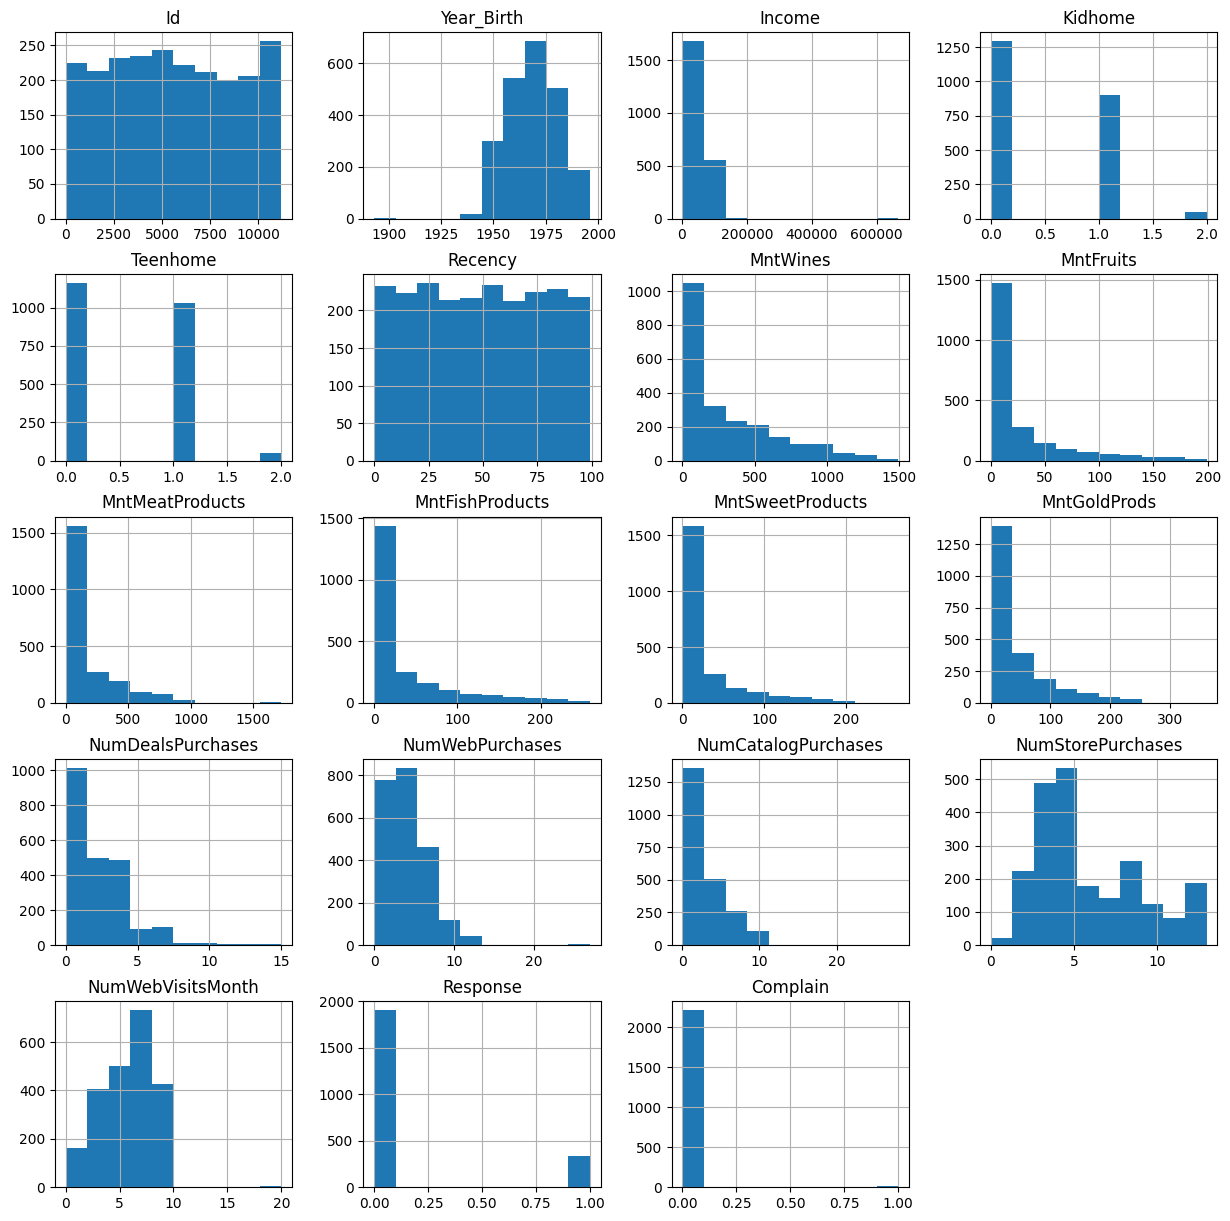

In [9]:
df.hist(figsize=(15,15));

In [10]:
df["Age"] = 2022 - df["Year_Birth"]

In [11]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

l_years = []
for i in df["Dt_Customer"]:
  f = dt.datetime.now().date() - i.date()
  l_years.append(f.days/365)
df.insert(loc=23, column="Year_Dt", value = l_years)

In [12]:
df = df.drop(["Id", "Year_Birth", "Dt_Customer"], axis=1)

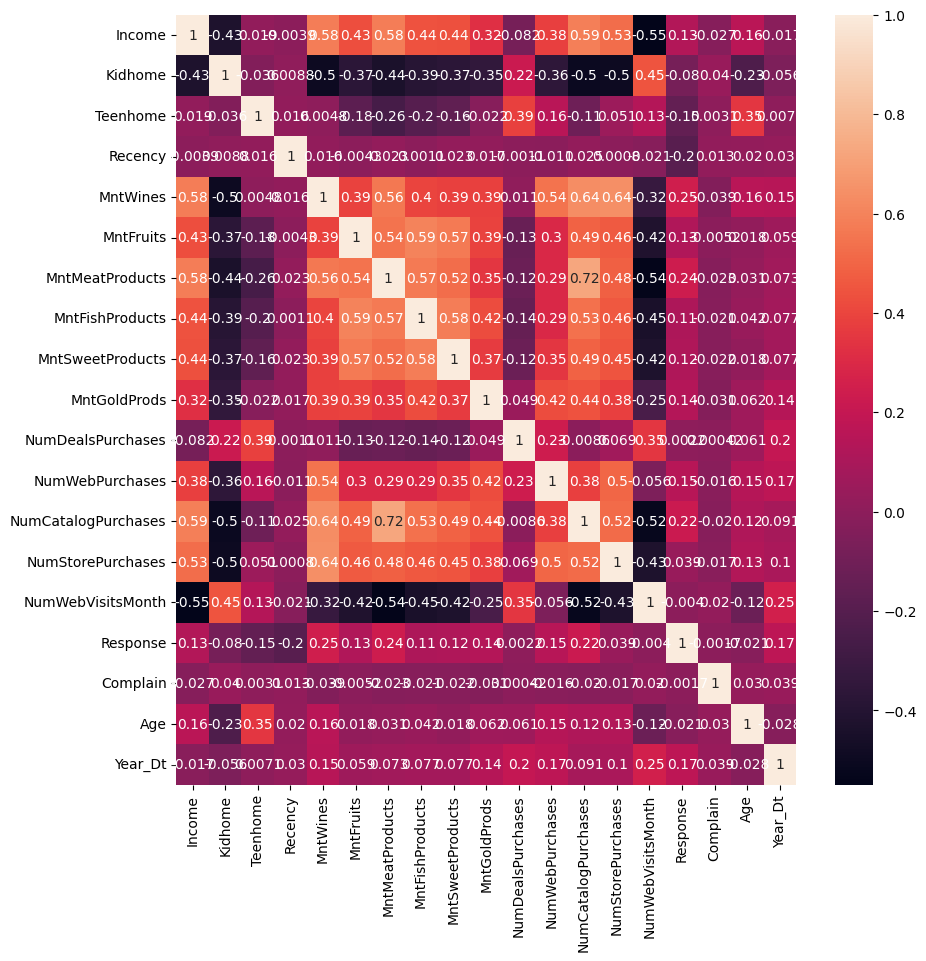

In [38]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True);

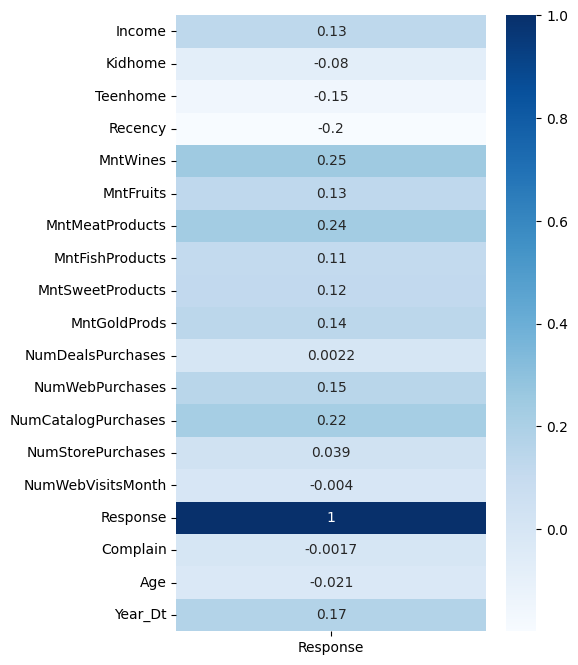

In [14]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(5,8))
sns.heatmap(pd.DataFrame(corr.Response), annot=True, cmap="Blues");

COLUMNAS MÁS SIGNIFICATIVAS


Las columnas más determinantes y más relacionadas con Response, son:


MntWines: Según nuestra matriz de correlación, las personas que gastan mas en productos vitivinícolas en la tienda son las personas que más adquirieron la oferta.


    Observamos que las personas que adquirieron la oferta gastan un promedio de $500 en productos vitivinícolas.


MntMeatProducts: También existe una relación muy fuerte con las personas que gastan en productos cárnicos, estas personas también tienden a adquirir más la oferta que aquellos que no acostumbran comprar productos de ese tipo.


    Observamos que las personas que adquirieron la oferta gastan un promedio de $180 en productos cárnicos.


NumCatalogPurchases: Personas que compran productos por catálogo también tienden a adquirir la oferta.


    Observamos que las personas que adquirieron la oferta compran un promedio de 4 veces.


Recency: Las personas que hacen compras más frecuentemente también tienden a adquirir más la oferta que las personas que hacen compras con varios días de diferencia.


    Observamos que las personas que adquirieron la oferta compran con una frecuencia promedio de 30 días.


Year_Dt: También existe una relación de antigüedad, mientras más antiguos sea el alta con la tienda, tienden a adquirir más la oferta que las personas que se dieron de alta más recientemente.


    Observamos que las personas que adquirieron la oferta tienen una antigüedad de un promedio de 10 años desde que se dieron de alta en la tienda.

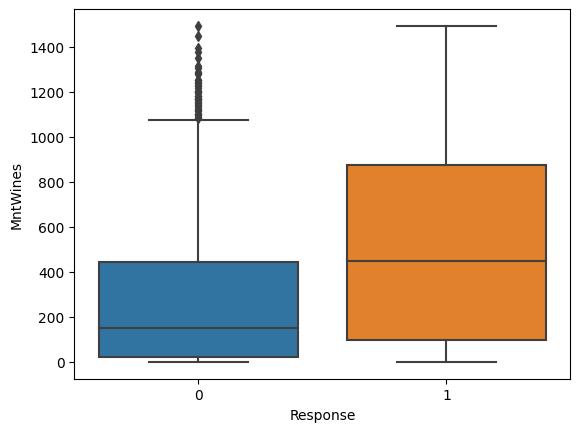

In [15]:
sns.boxplot(x="Response", y="MntWines", data=df);

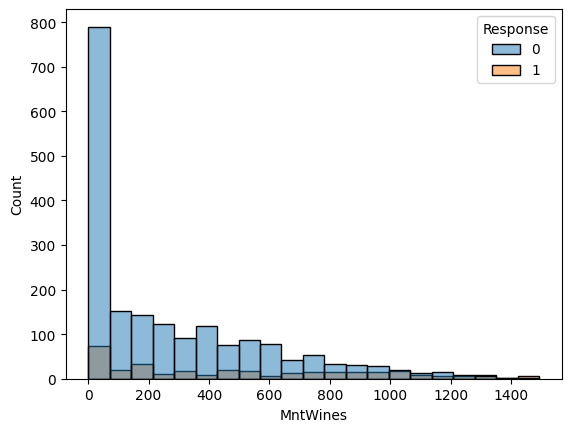

In [16]:
sns.histplot(x = "MntWines", hue="Response", data=df);

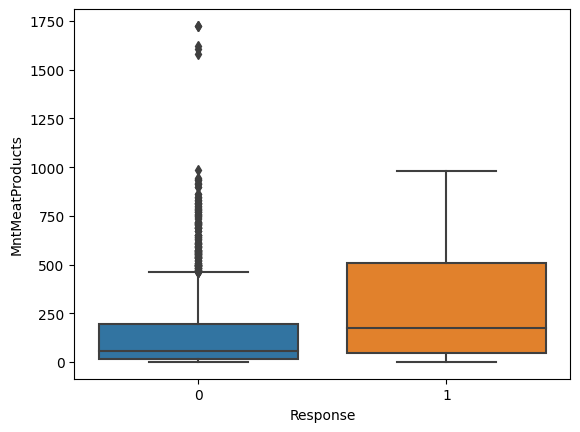

In [17]:
sns.boxplot(x="Response", y="MntMeatProducts", data=df);

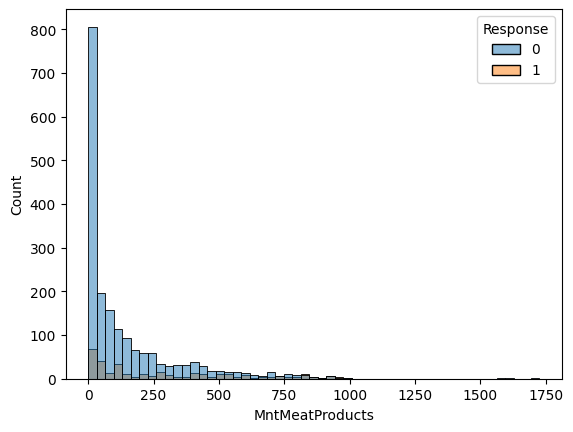

In [18]:
sns.histplot(x="MntMeatProducts", hue="Response", data=df);

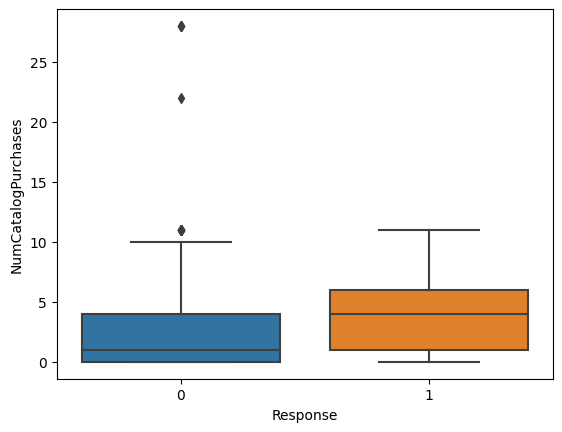

In [19]:
sns.boxplot(x="Response", y="NumCatalogPurchases", data=df);

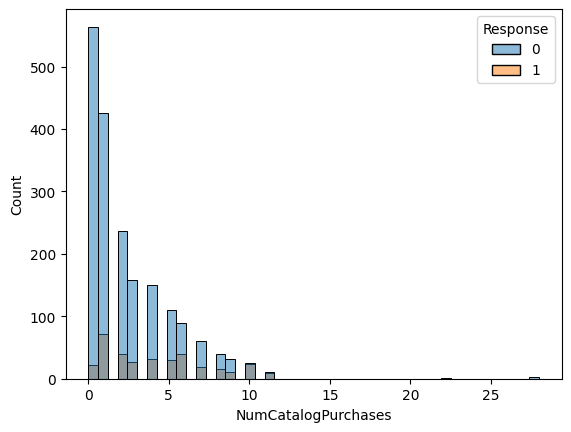

In [20]:
sns.histplot(x="NumCatalogPurchases", hue="Response", data=df);

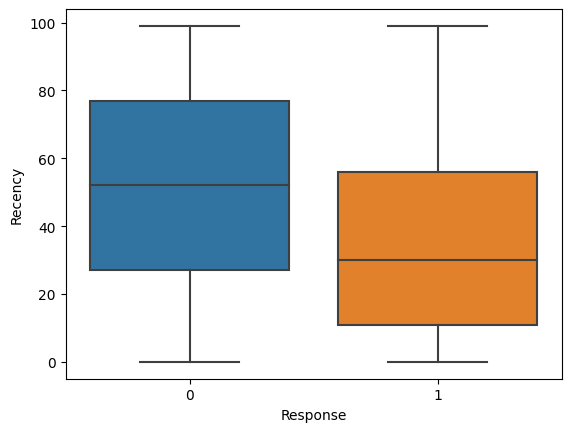

In [21]:
sns.boxplot(x="Response", y="Recency", data=df);

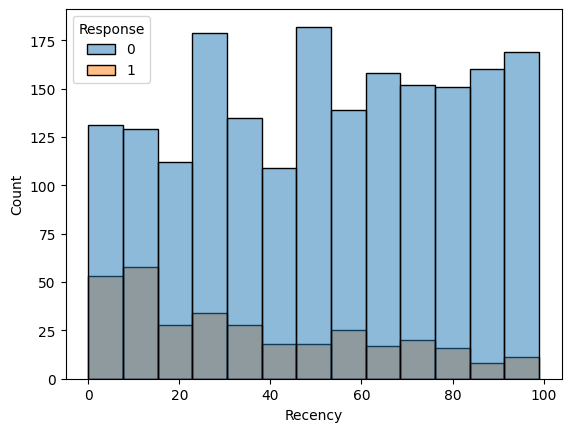

In [22]:
sns.histplot(x="Recency", hue="Response", data=df);

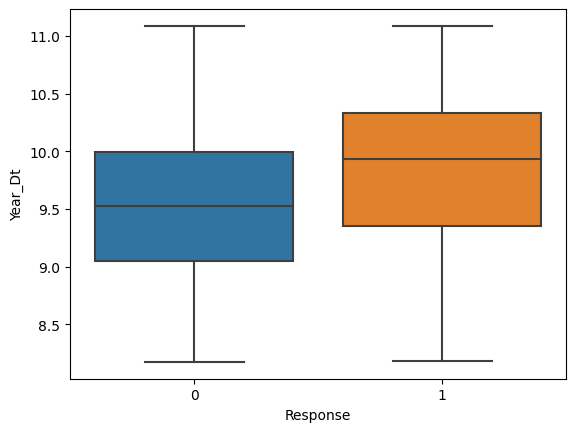

In [23]:
sns.boxplot(x="Response", y="Year_Dt", data=df);

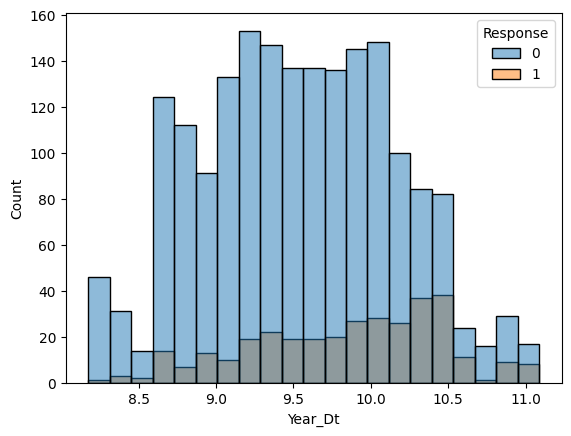

In [24]:
sns.histplot(x="Year_Dt", hue="Response", data=df);

RELACION CON COLUMNAS CATEGORICAS

Porcentaje de personas que adquieren la oferta con respecto a la Educación y al Estado Marital

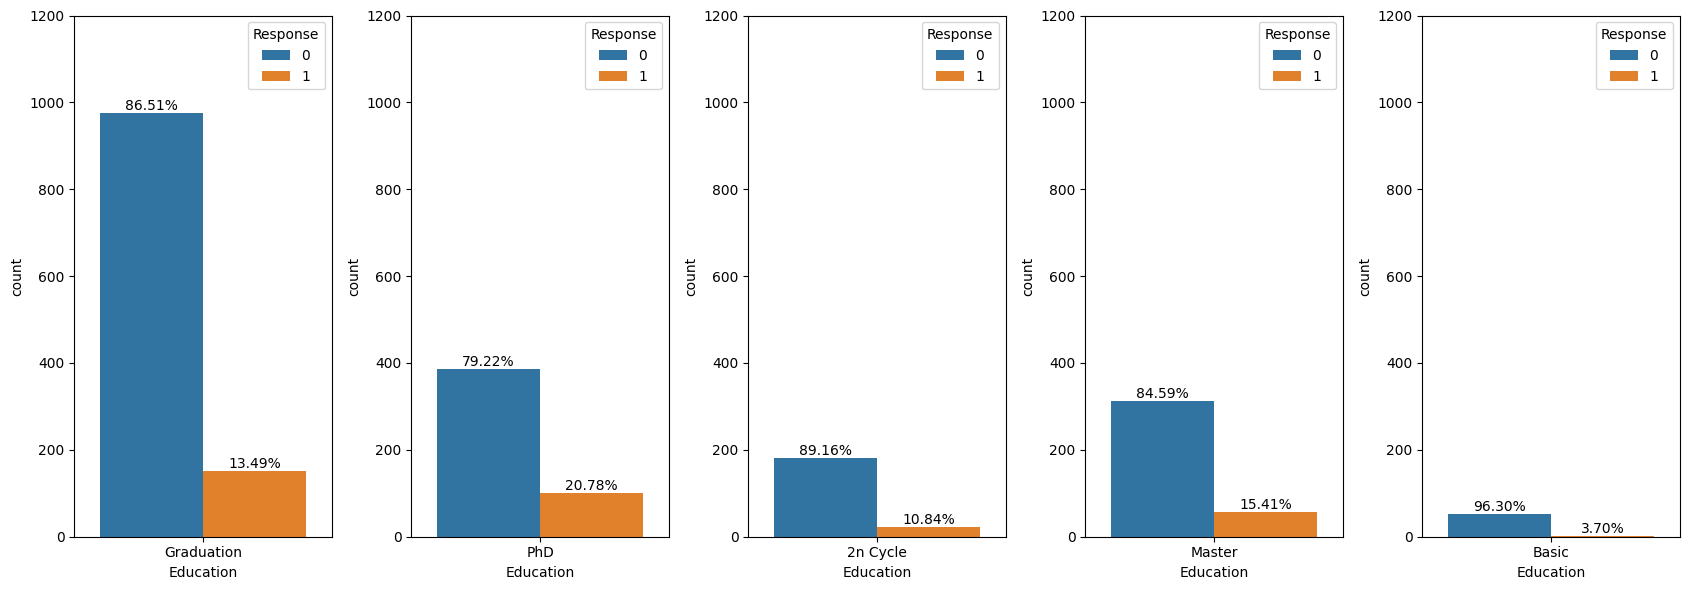

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(17,6))
n=len(df.Education.unique())
for i,j in enumerate(df.Education.unique()): 
    plt.subplot(1,n,i+1)
    plt.ylim(0, 1200)
    plt.yticks(range(0, 1201, 200))
    ax = sns.countplot(x=df[df["Education"] == j].Education,  hue="Response", palette="tab10", data=df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2,
                height + 0.1,
                '{:.2%}'.format(height / df['Education'].value_counts(sort=False)[i]),
                ha="center", va="bottom")
plt.tight_layout()

plt.show()

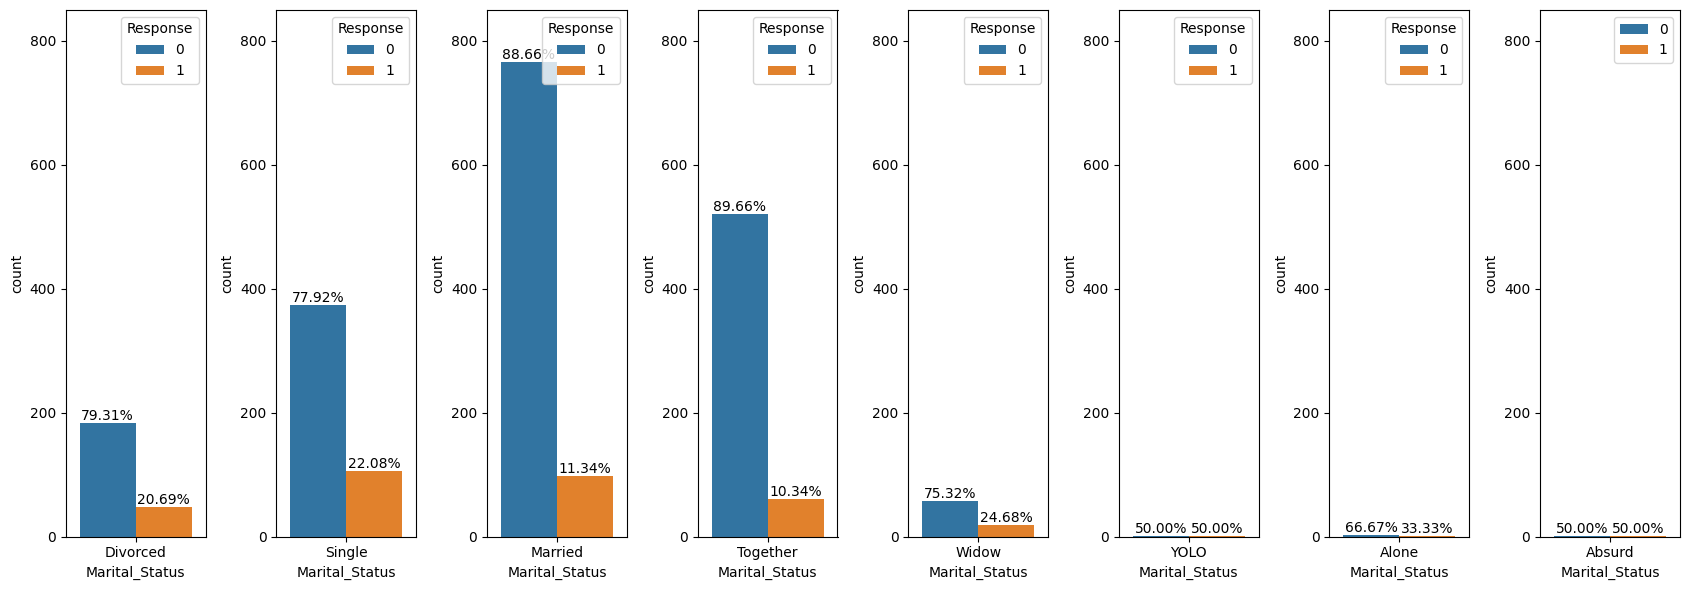

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(17,6))
n=len(df.Marital_Status.unique())
for i,j in enumerate(df.Marital_Status.unique()):
    
    plt.subplot(1,n,i+1)
    plt.ylim(0, 850)
    plt.yticks(range(0, 851, 200))
    ax = sns.countplot(x=df[df["Marital_Status"] == j].Marital_Status,  hue="Response", palette="tab10", data=df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2,
                height + 0.1,
                '{:.2%}'.format(height / df['Marital_Status'].value_counts(sort=False)[i]),
                ha="center", va="bottom")
plt.tight_layout()
plt.show()